In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

In [2]:
dataset = pd.read_csv('ex1data1.txt',header = None)
X = np.c_[np.ones((dataset[0].size,1)),dataset[0]]
y = np.c_[dataset.iloc[:,1]]

In [3]:
def hypothesis(theta,X): #Linear hypothesis function
    return X.dot(theta)

In [4]:
def cost_fun(X,y,theta = [[0],[0]]):
    h = hypothesis(theta,X)
    m = y.size
    J = (1/(2*m))*np.sum(np.square((h - y)))
    return J

In [5]:
def gradient_desc(h, y, X, alpha,theta = [[0],[0]],iteration = 1500):
    m = y.size
    J_iter = np.zeros(iteration)
    for it in range(iteration):
        h = hypothesis(theta,X)
        theta = theta - alpha*(1/(m))*(X.T.dot(h-y))
        J_iter[it] = cost_fun(X,y,theta)
    return (theta,J_iter)

In [6]:
initial_theta = np.ones((X.shape[1],1))
h = hypothesis(initial_theta,X)
theta,J_history = gradient_desc(h,y,X,0.01)

[-3.63029144  1.16636235]


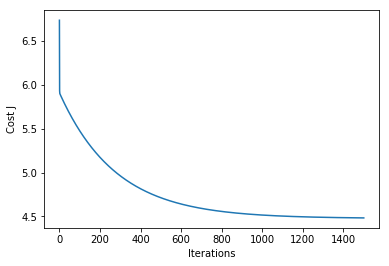

In [7]:
t = np.linspace(0,len(J_history),len(J_history))
plt.plot(t,J_history)
plt.ylabel('Cost J')
plt.xlabel('Iterations');
print(theta.ravel())

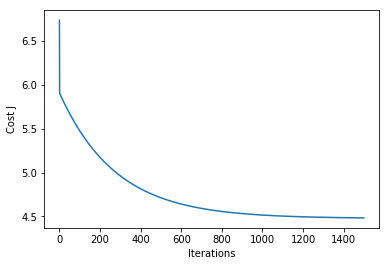

In [8]:
# Obtained
plt.plot(J_history)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

In [9]:
predict = hypothesis(theta.ravel(),X)

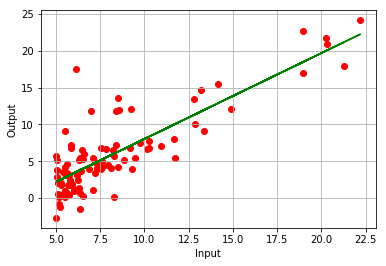

In [14]:
plt.scatter(dataset[0],dataset[1],color='r')
plt.plot(dataset[0],predict,color='g')
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.show()

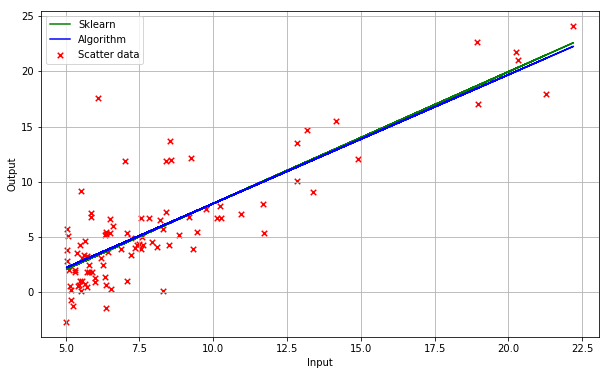

In [36]:
LR = LinearRegression()
model = LR.fit(X,y)
pred = model.predict(X)
plt.figure(figsize=(10,6))
plt.scatter(dataset[0],dataset[1],color='r',marker='x',linewidths=1,s=30,label='Scatter data')
plt.plot(dataset[0],pred,color='g',label='Sklearn')
plt.plot(dataset[0],predict,color='b',label='Algorithm')
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.legend()
plt.show()

In [34]:
print(hypothesis(theta.ravel(),np.array([1,3.5]))*10000)
print(hypothesis(theta.ravel(),np.array([1,7]))*10000)

4519.7678677017675
45342.45012944714


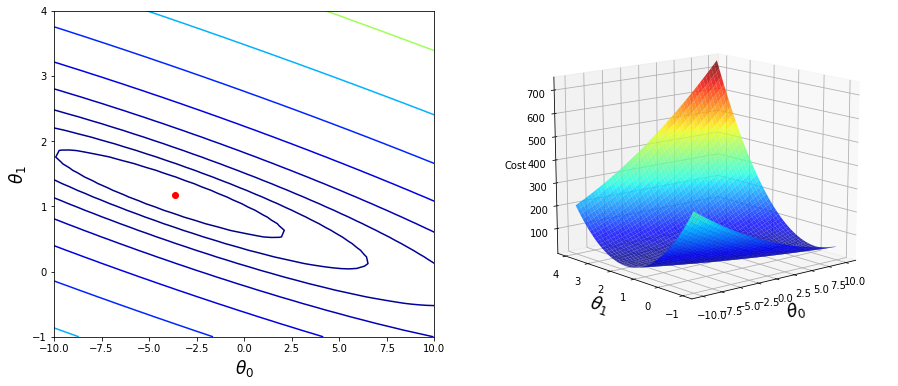

In [74]:
# Contour Plot
B0 = np.linspace(-10,10,50)
B1 = np.linspace(-1,4,50)
xx,yy = np.meshgrid(B0,B1,indexing='xy')
Z = np.zeros((B0.size,B1.size))

for (i,j),v in np.ndenumerate(Z):
    Z[i,j]  = cost_fun(X,y,theta=[[xx[i,j]],[yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left Plot

CS = ax1.contour(xx,yy,Z,np.logspace(-2, 3, 20),cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1],c='r')

# Right plot
ax2.plot_surface(xx,yy,Z,rstride=1,cstride=1,cmap=plt.cm.jet,alpha=0.8)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev =15, azim = 230)

for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)